In [1]:
from torchvision import models

In [2]:
dir(models)
#Capitalized names refer to popular models that are encapsulated into classes
#lowercase names are convenienrce functions that return models from classes, different numbers means different layers

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:

alexnet = models.AlexNet()

## 用resnet进行一次图片学习

### 首先预训练resnet

In [4]:
#now initialize a pretrained ResNet
resnet = models.resnet101(pretrained=True)

In [5]:
#take a look at it
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 预处理图片

In [6]:
#preprocess the input images
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256), #resize to 256*256
    transforms.CenterCrop(224), #crop the image around the corner size 224*224
    transforms.ToTensor(), # transform to a tensor
    transforms.Normalize( 
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224, 0.225]
    ) 
])

In [7]:
from PIL import Image

In [8]:
img = Image.open("../bondi_beach.jpg")

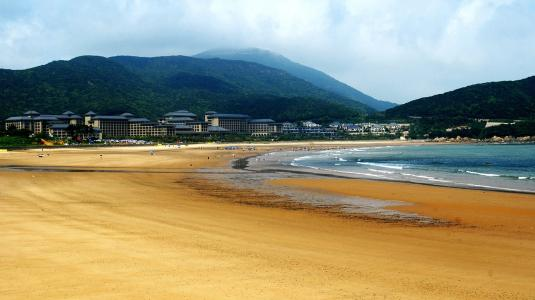

In [9]:
img

In [10]:
# 处理后的图片
img_t = preprocess(img)

In [11]:
img_t

tensor([[[ 1.3755,  1.3584,  1.3242,  ...,  1.4954,  1.4612,  1.4612],
         [ 1.3242,  1.2899,  1.2557,  ...,  1.4954,  1.4612,  1.4612],
         [ 1.3070,  1.2728,  1.2385,  ...,  1.5125,  1.4783,  1.4783],
         ...,
         [ 2.0948,  2.0605,  2.0434,  ...,  1.5810,  1.6495,  1.6495],
         [ 2.0605,  2.0263,  2.0263,  ...,  1.5468,  1.5639,  1.5639],
         [ 2.0263,  2.0263,  1.9920,  ...,  1.5982,  1.4783,  1.4612]],

        [[ 1.9734,  1.9559,  1.9209,  ...,  2.0784,  2.0784,  2.0784],
         [ 1.9559,  1.9209,  1.8859,  ...,  2.0784,  2.0784,  2.0784],
         [ 1.9384,  1.9034,  1.8683,  ...,  2.0959,  2.0959,  2.0959],
         ...,
         [ 1.6232,  1.5707,  1.5532,  ...,  0.8529,  0.9230,  0.9230],
         [ 1.5882,  1.5532,  1.5532,  ...,  0.8179,  0.8354,  0.8354],
         [ 1.5532,  1.5532,  1.5182,  ...,  0.8704,  0.7479,  0.7304]],

        [[ 2.5703,  2.5529,  2.5180,  ...,  2.5354,  2.5180,  2.5354],
         [ 2.5354,  2.5006,  2.4657,  ...,  2

In [12]:
import torch
print('before:',img_t.size())
batch_t = torch.unsqueeze(img_t, 0)
print('after:', batch_t.size())

before: torch.Size([3, 224, 224])
after: torch.Size([1, 3, 224, 224])


### 运用resnet进行预训练

In [13]:
#make sure the batch normalization and dropout work!
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out = resnet(batch_t)

In [15]:
out
out.shape

torch.Size([1, 1000])

### 得到相应类别和概率

In [19]:
#读入类别列表
with open('../PyTorch-Hub/imagenet_classes.txt') as f:
    labels =[line.strip() for line in f.readlines()]

In [20]:
_, index = torch.max(out, 1)

In [21]:
index

tensor([978])

In [22]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('seashore', 93.52230834960938)

In [23]:
#前五的排名
_, idxes =torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in idxes[0][:5]]

[('seashore', 93.52230834960938),
 ('sandbar', 5.7671051025390625),
 ('lakeside', 0.40486374497413635),
 ('promontory', 0.14862774312496185),
 ('volcano', 0.028820358216762543)]